<a href="https://colab.research.google.com/github/Salvoaf/labDeepLearning/blob/main/06_Classifying_Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST dataset
- Chapter 2, Section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). 




![img](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png) 

The problem is well-known: which digit is depicted in each image?

- MNIST: Modified National Institute of Standards and Technology;
- images of handwritten digits (28 pixels by 28 pixels);
- 10-way classification problem (0 to 9);
- 60,000 training images, plus 10.000 test images;


## Are the results stable?

Training in Neural Networks is a stochastic procedure: it involves a number of random operations, such as random initialization of weights.

As a consequence, if we train the same model twice, we will get different results.

Consider this example:

In [ ]:
import numpy as np
print(np.random.randint(0,10,5))
print(np.random.randint(0,10,5))

[3 6 4 9 8]
[1 5 5 7 9]


However, we can get reproducible results by setting the *seed*, i.e. a number used to initialize the pseudorandom number generator.

In [ ]:
np.random.seed(13)
print(np.random.randint(0,10,5))
print(np.random.randint(0,10,5))
print()
np.random.seed(13)
print(np.random.randint(0,10,5))
print(np.random.randint(0,10,5))
print()
np.random.seed(13)
print(np.random.randint(0,10,10))
print(np.random.randint(0,10,5))

[2 0 0 6 2]
[4 9 3 4 2]

[2 0 0 6 2]
[4 9 3 4 2]

[2 0 0 6 2 4 9 3 4 2]
[6 5 9 4 2]


Nevertheless, fixing the numpy source of randomness does not ensure reproducible behavior: we can still get different results because of randomness introduced by third-part libraries or by the usage of GPU.

### Long Story Short
- getting reproducible results using Keras with Tensorflow as Backend is arduous
- currently, exact reproducibility:
  - is not guaranteed on GPU
  - requires a bit of coding effort and increased runtime on CPU



## Setup the Environment

In [ ]:
import os
dir_name = "my_models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)

**Pay attention** ❗

The `my_models` folder will be lost when the lifetime of your google VM will expire.

If you want to store something in a **persistent manner**, you can consider [mounting Google drive](https://colab.research.google.com/notebooks/io.ipynb)

Snippet from [how can i obtain reproducible results using keras during development?](https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development)

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import random as rn

# The below is necessary for reproducible results of certain Python hash-based operations.
os.environ["PYTHONHASHSEED"]="0"

# The below is necessary for starting Numpy generated random numbers in a well-defined initial state.
np.random.seed(31)

# The below is necessary for starting core Python generated random numbers in a well-defined state.
rn.seed(14)

# The below tf.random.set_seed will make random number generation in TensorFlow have a well-defined initial state.
tf.random.set_seed(1234)

However:
> *when running on a GPU, some operations have non-deterministic outputs, in particular tf.reduce_sum(). This is due to the fact that GPUs run many operations in parallel, so the order of execution is not always guaranteed. Due to the limited precision of floats, even adding several numbers together may give slightly different results depending on the order in which you add them.*

The above mentioned tricks reduce the impact of most non-deterministic operations, but some others may be created automatically by TensorFlow to compute the gradients when using GPU.
To date, the only safe way to get exactly reproducible results is to set the random seeds AND run the code on the CPU. For this, you can set the `CUDA_VISIBLE_DEVICES` environment variable to an empty string, or disable the GPU in colab environment.




## Download the Dataset

In [ ]:
from tensorflow.keras import datasets
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
print(train_images.ndim)
print(train_labels.ndim)

3
1


In [ ]:
print(train_images.dtype)
print(test_images.dtype)

uint8
uint8


In [ ]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

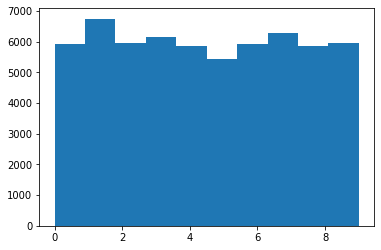

In [ ]:
plt.hist(train_labels)
plt.show()

In [ ]:
index_selection = 19
train_images[index_selection].shape, train_images[index_selection,:,:].shape

((28, 28), (28, 28))

True Label is 9


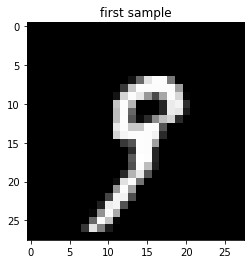

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  18 105 227 253 253
  122   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  57 199 253 25

In [ ]:
# use matplotlib to plot the first training sample
print('True Label is',train_labels[index_selection])
plt.imshow(train_images[index_selection,:,:], cmap = 'gray')
plt.title('first sample')
plt.show()
print(train_images[index_selection,:,:])

## Building the model

### HyperParameters vs Parameters

When we want to build a model we have to carefully design its components: how many hidden layers? how many units per layer? Which optimizer and learning rate value?

Indeed, the behaviour of an algorithm for training a neural network is affected
by a set of **hyperparameters**. Examples of hyperparameters are:
- Number of layers and hidden units: affects the capacity of the model;
- Learning rate: determines the step size in learning procedure;
- Learning rate decay strategy;
- Mini-batch size;
- Number of epochs of training and stop criterion;
- Weights initialization strategy;
- Preprocessing strategy;
- and possibly many others

They are defined *hyperparameters*, as opposed to the *parameters* of a network, i.e. weights and biases that define the behaviour of neurons and are adjusted by the training procedure. That is why *parameters* are referred to as *trainable parameters*.

Defining the correct hyperparameter configuration is of the utmost importance, and it may take days or weeks of tuning. Indeed, an active area of research is *hyperparameter optimization*.

In [ ]:
# the number of output units and their activation is determined by our problem: ten digits
output_units = 10
output_activation = 'softmax'

# Hyperparameters
hidden_units = 512
hidden_activation = 'relu'

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(hidden_units, activation=hidden_activation, input_shape=(28 * 28,)))
network.add(layers.Dense(output_units, activation=output_activation))

A more compact syntax can be used:
```python
model = keras.Sequential([
    layers.Dense(hidden_units, activation=hidden_activation, input_shape = (28*28,)),
    layers.Dense(output_units, activation=output_activation)
])
```



In [ ]:
network.summary() # pay attention to the number of parameters. where do they come from?

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Let's evaluate the number of parameters
first_layer = 28*28*512+512
first_layer

401920

To make our network ready for training, we need to set three more things:

* a loss function;
* an optimizer;
* metrics to monitor during training and testing.

In [ ]:
network.compile?

In [ ]:
network.compile(optimizer='rmsprop', # rmsprop (Root Mean Square Propagation) is a good choice for the optimizer
                loss='categorical_crossentropy', # categorical crossentropy for a multi-class clasification problem
                metrics=['accuracy']) # accuracy = number of correctly labeled samples / number of samples

Sometimes you may want to configure your optimizer. This can be done by passing an optimizer class instance as the `optimizer` argument.


```python
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
```

Similarly, you can pass custom loss or metric functions as arguments of `compile`.

## Preparing the dataset
Our network is a MLP: we need to reshape images into a vector of input units.

Remember that our network expects a 2D tensor of input shape of (Batch_size, 28*28=784) 

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

In [ ]:
train_images.shape # check the shape!

(60000, 784)

uint8


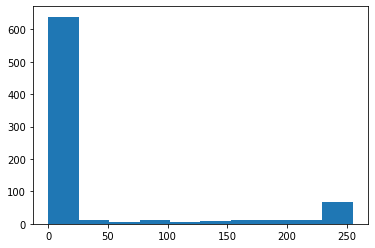

In [ ]:
print(train_images[0].dtype) # check the type
plt.hist(train_images[0]) # check the value range and the distribution
plt.show()

Original tensor are of type 'uint8' with values in the range [0,255]. 

We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1

float32


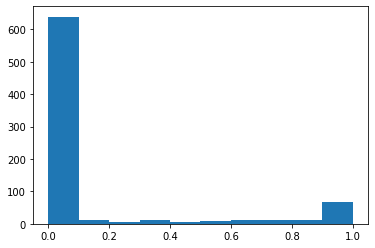

In [ ]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
print(train_images[0].dtype)
plt.hist(train_images[0])
plt.show()

When using the **categorical_crossentropy** loss, your targets should be in categorical (one-hot encoding) format: e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except for a 1 at the index corresponding to the class of the sample. In order to convert integer targets into categorical targets, you can use the Keras utility to_categorical:

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

You can also use the original **integer** labels coupled with an ad-hoc loss function, namely **sparse_categorical_crossentropy**.

To sum up (loss function and labels encoding)
*   use `categorical_crossentropy` with **one-hot encoding** (e.g., after applying `to_categorical` utility function)
*   use `sparse_categorical_crossentropy` with **integer encoding**




## Training the model


In [ ]:
network.fit?

In [ ]:
# other hyperparameters
epochs = 10 # how many times the network experiments the whole training set
batch_size = 128 #how many examples the network exmperiments at every step

In [ ]:
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=batch_size,
                      shuffle = True)

Epoch 1/10
469/469 [==============================] - 11s 21ms/step - loss: 0.2539 - accuracy: 0.9260
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1029 - accuracy: 0.9695
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0678 - accuracy: 0.9799
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0501 - accuracy: 0.9849
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0379 - accuracy: 0.9883
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0288 - accuracy: 0.9912
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0221 - accuracy: 0.9936
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0167 - accuracy: 0.9951
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0125 - accuracy: 0.9965
Epoch 10/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0100 - accur

In [ ]:
history?
history.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x7f301231d090>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.25386613607406616,
   0.10292712599039078,
   0.06775671243667603,
   0.05010628327727318,
   0.03788979351520538,
   0.028765065595507622,
   0.02206891030073166,
   0.016708333045244217,
   0.012453901581466198,
   0.01000402495265007],
  'accuracy': [0.9259666800498962,
   0.9695000052452087,
   0.9799333214759827,
   0.9848999977111816,
   0.9882500171661377,
   0.9912333488464355,
   0.9935500025749207,
   0.9950833320617676,
   0.9965166449546814,
   0.9971166849136353]},
 'params': {'verbose': 1, 'epochs': 10, 'steps': 469},
 'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}

loss [0.25386613607406616, 0.10292712599039078, 0.06775671243667603, 0.05010628327727318, 0.03788979351520538, 0.028765065595507622, 0.02206891030073166, 0.016708333045244217, 0.012453901581466198, 0.01000402495265007]
acc [0.9259666800498962, 0.9695000052452087, 0.9799333214759827, 0.9848999977111816, 0.9882500171661377, 0.9912333488464355, 0.9935500025749207, 0.9950833320617676, 0.9965166449546814, 0.9971166849136353]


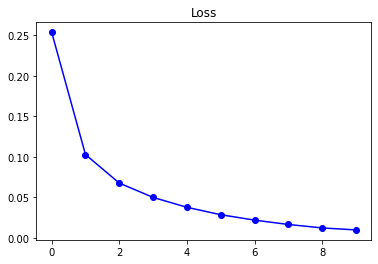

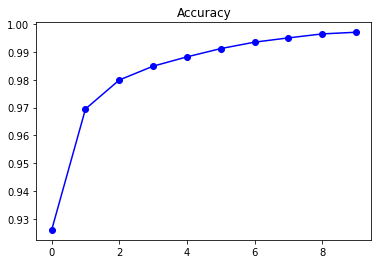

In [ ]:
# history.history is a dictionary
loss = history.history["loss"]
acc = history.history["accuracy"]
print('loss',loss)
print('acc',acc)
plt.figure()
plt.plot(loss,'o-b')
plt.title('Loss')
plt.show()
plt.figure()
plt.plot(acc,'o-b')
plt.title('Accuracy')
plt.show()

## Evaluate the model on the Test Set



Let's check that our model performs well on the test set too:

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0752 - accuracy: 0.9808
test_acc: 0.9807999730110168


What's happening here? We will obtain test accuracy step by step.

In [ ]:
predictions = network.predict(test_images) # get the output for each sample
predictions[0]

313/313 [==============================] - 1s 3ms/step


array([1.1523343e-12, 5.3685425e-16, 1.0958965e-09, 2.2395443e-07,
       4.9834199e-16, 1.0500917e-11, 2.8434098e-18, 9.9999970e-01,
       4.8141879e-11, 4.6440449e-10], dtype=float32)

In [ ]:
np.argmax(predictions[0]) # from one-hot encoding to integer

7

In [ ]:
np.argmax(test_labels[0]) # check if the predicted label agrees with the ground-truth

7

In [ ]:
predicted_lab = np.argmax(predictions,axis=1) # from one-hot encoding to integer
test_lab = np.argmax(test_labels,axis=1) # from one-hot encoding to integer
predicted_lab.shape,test_lab.shape

((10000,), (10000,))

In [ ]:
correct_predictions = np.sum(np.equal(predicted_lab,test_lab))
accuracy = correct_predictions/len(test_lab)
print(accuracy)

0.9808


In [ ]:
#save the trained model, we will compare its performance with another, more sofisticated, model
network.save(os.path.join(dir_name,"MNIST_MLP.h5"))  # creates a HDF5 file 'my_model.h5'
del network

In [ ]:
try:
  predictions = network.predict(test_images) # get the output for each sample
except NameError as exc:
  print(exc)

name 'network' is not defined


In [ ]:
# try to load the model again
from tensorflow.keras.models import load_model

model = load_model(os.path.join(dir_name, "MNIST_MLP.h5"))
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('test_acc:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0752 - accuracy: 0.9808
test_acc: 0.9807999730110168


In [ ]:
# useful to free GPU and memory
from tensorflow.keras import backend as K
del model
K.clear_session() 